In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [34]:
X = pd.read_csv('mnist_train.csv')

In [5]:
print(X[0])

KeyError: 0

In [24]:
plt.figure()
X=np.array(X)
print(X.shape)
#plt.imshow(X = [X[1][1:],1],cmap = 'gray')

(60000, 785)


<Figure size 432x288 with 0 Axes>

In [27]:
for i in range(1,60000):
    for j in range(1,785):
        X[i][j]=int(X[i][j])
        

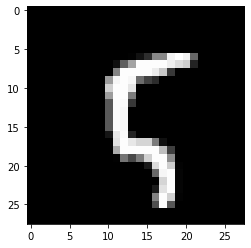

In [30]:
img = X[100][1:].reshape((28,28))
plt.imshow(X = img,cmap = 'gray')


In [37]:
import math
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [36]:
X= np.array(X)
Y = X[:,:1]
X= X[:,1:]
print(X.shape,Y.shape)

(60000, 784) (60000, 1)


In [53]:
def knn(X,Y,query,k=500):
    vals =[]
    m = X.shape[0]
    
    for i in range(1,m):
        d= dist(query,X[i])
        vals.append((d,Y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    #print(newvals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [41]:
X_t = pd.read_csv('mnist_test.csv')
X_t = np.array(X_t)

In [43]:
Y_t = X_t[:,:1]
X_t = X_t[:,1:]

In [ ]:
pred = knn(X,Y,X_t[15])
print(int(pred))

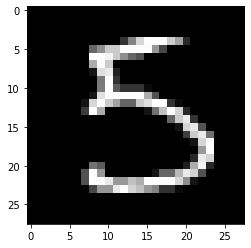

In [57]:
img = X_t[15][:].reshape((28,28))
plt.imshow(X = img,cmap = 'gray')


In [64]:
def getaccuracy(X,Y,X_t,Y_t,k=20):
    n = X_t.shape[0]
    corr= 0
    for i in range(100):
        pred = knn(X,Y,X_t[i],k)
        if pred==Y_t[i]:
            corr +=1
           

In [65]:
getaccuracy(X,Y,X_t,Y_t)

0.97
